In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from Features import *



In [61]:
df=pd.read_csv('../ReadyData/EURUSD_2020_2023_15M_READY.csv',index_col=0,parse_dates=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98992 entries, 2020-01-02 00:15:00 to 2023-12-20 12:45:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       98992 non-null  float64
 1   high       98992 non-null  float64
 2   low        98992 non-null  float64
 3   close      98992 non-null  float64
 4   volume     98992 non-null  int64  
 5   low_time   98989 non-null  object 
 6   high_time  98989 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.0+ MB


# Features and strategy logic

In [63]:
df = bollinger_band(df,'close',20,2)
htf = resample_dataframe(df,'1H')
htf = htf.shift()

htf = macd(htf, "close", 12, 26, 9)
df = df.merge(htf[['macd', 'signal_line']], left_index=True, right_index=True, how='left')
df[['macd', 'signal_line']] = df[['macd', 'signal_line']].ffill() 
df = atr(df,5)
df['hour'] = df.index.hour
df.tail()

df['diff_boll_h'] = df['close'] - df['BB_H']
df['diff_boll_l'] = df['close'] - df['BB_L']
df['diff_boll_m'] = df['close'] - df['BB_M']

<Axes: xlabel='time'>

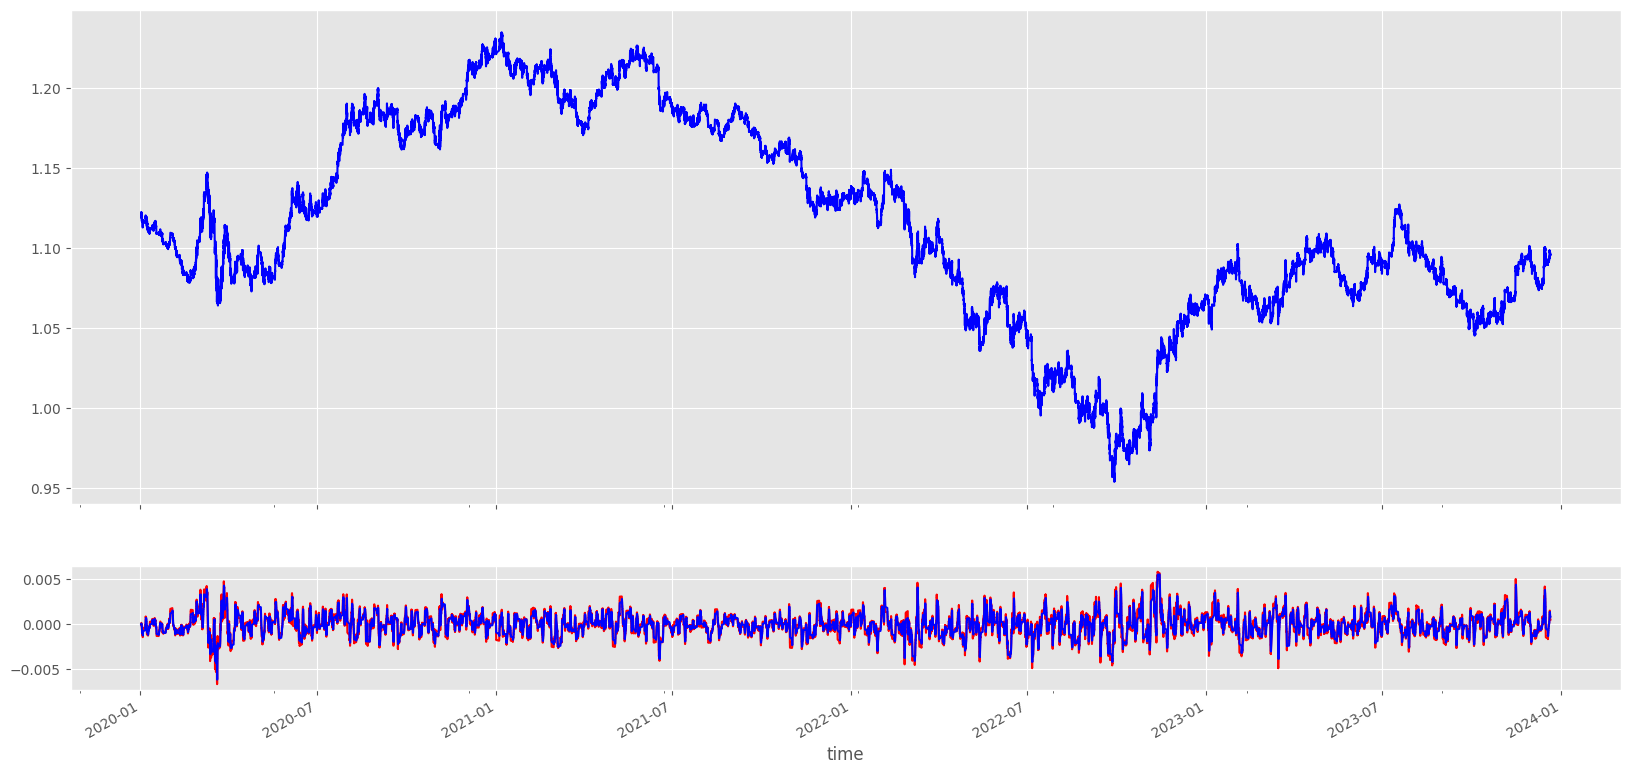

In [64]:
fig, axs = plt.subplots(2,1,figsize = (20,10), height_ratios=[8,2],sharex = True)

df['close'].plot(ax=axs[0],color = 'blue')
df['macd'].plot(ax=axs[1],color = 'red')
df['signal_line'].plot(ax = axs[1], color = 'blue')

In [65]:
df

,open,high,low,close,volume,low_time,high_time,BB_M,BB_H,BB_L,macd,signal_line,ATR,hour,diff_boll_h,diff_boll_l,diff_boll_m
time,,,,,,,,,,,,,,,,,
2020-01-02 00:15:00,1.12073,1.12152,1.12073,1.12144,88,2020-01-02 00:15:00,2020-01-02 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2020-01-02 00:30:00,1.12145,1.12157,1.12141,1.12151,53,2020-01-02 00:34:00,2020-01-02 00:44:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2020-01-02 00:45:00,1.12156,1.12165,1.12142,1.12142,253,2020-01-02 00:59:00,2020-01-02 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2020-01-02 01:00:00,1.12142,1.12216,1.12142,1.12201,252,2020-01-02 01:00:00,2020-01-02 01:03:00,NaN,NaN,NaN,0.000000,0.000000,NaN,1,NaN,NaN,NaN
2020-01-02 01:15:00,1.12201,1.12211,1.12195,1.12211,66,2020-01-02 01:17:00,2020-01-02 01:29:00,NaN,NaN,NaN,0.000000,0.000000,0.000416,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 11:45:00,1.09629,1.09655,1.09628,1.09644,684,2023-12-20 11:45:00,2023-12-20 11:49:00,1.096206,1.096996,1.095417,0.000513,0.000856,0.000562,11,-0.000556,0.001023,0.000234
2023-12-20 12:00:00,1.09642,1.09652,1.09591,1.09600,745,2023-12-20 12:09:00,2023-12-20 12:01:00,1.096176,1.096947,1.095405,0.000455,0.000776,0.000580,12,-0.000947,0.000595,-0.000176
2023-12-20 12:15:00,1.09599,1.09624,1.09495,1.09518,818,2023-12-20 12:25:00,2023-12-20 12:17:00,1.096106,1.096971,1.095241,0.000455,0.000776,0.000706,12,-0.001791,-0.000061,-0.000926


# Model developement

In [66]:
# split into train and test data
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

In [67]:
train['returns'] = np.log(train['close'] / train['close'].shift(1))
train.dropna(inplace=True)
train['direction'] = np.where(train['returns'] > 0.0005, 1, 0)
train['direction'] = np.where(train['returns'] < -0.0005, -1, train['direction'])
train['direction'].value_counts()

direction
 0    62358
-1     8512
 1     8301
Name: count, dtype: int64

In [68]:
train.columns

Index(['open', 'high', 'low', 'close', 'volume', 'low_time', 'high_time',
       'BB_M', 'BB_H', 'BB_L', 'macd', 'signal_line', 'ATR', 'hour',
       'diff_boll_h', 'diff_boll_l', 'diff_boll_m', 'returns', 'direction'],
      dtype='object')

In [69]:
features = train[['diff_boll_h', 'diff_boll_l', 'diff_boll_m']]
target= train['direction']

In [70]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

lm.fit(features, target)


LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [71]:
train['prediction'] = lm.predict(features)

# Bullshit if there is also 0 for some range, but usefull in binary
#from sklearn.metrics import accuracy_score
#accuracy_score(train['direction'], train['prediction'])

In [73]:
features = test[['diff_boll_h', 'diff_boll_l', 'diff_boll_m']]

test['prediction'] = lm.predict(features)
test

,open,high,low,close,volume,low_time,high_time,BB_M,BB_H,BB_L,macd,signal_line,ATR,hour,diff_boll_h,diff_boll_l,diff_boll_m,prediction
time,,,,,,,,,,,,,,,,,,
2023-03-07 07:15:00,1.06892,1.06897,1.06873,1.06886,389,2023-03-07 07:24:00,2023-03-07 07:20:00,1.068744,1.069577,1.067911,0.001351,0.001343,0.000240,7,-0.000717,0.000949,0.000116,0
2023-03-07 07:30:00,1.06886,1.06887,1.06863,1.06869,347,2023-03-07 07:37:00,2023-03-07 07:30:00,1.068771,1.069557,1.067985,0.001351,0.001343,0.000246,7,-0.000867,0.000705,-0.000081,0
2023-03-07 07:45:00,1.06867,1.06871,1.06813,1.06852,581,2023-03-07 07:57:00,2023-03-07 07:45:00,1.068802,1.069485,1.068119,0.001351,0.001343,0.000334,7,-0.000965,0.000401,-0.000282,0
2023-03-07 08:00:00,1.06851,1.06868,1.06816,1.06821,694,2023-03-07 08:14:00,2023-03-07 08:00:00,1.068817,1.069429,1.068204,0.001280,0.001331,0.000362,8,-0.001219,0.000006,-0.000606,0
2023-03-07 08:15:00,1.06818,1.06839,1.06806,1.06826,645,2023-03-07 08:23:00,2023-03-07 08:19:00,1.068808,1.069448,1.068168,0.001280,0.001331,0.000382,8,-0.001188,0.000092,-0.000548,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 11:45:00,1.09629,1.09655,1.09628,1.09644,684,2023-12-20 11:45:00,2023-12-20 11:49:00,1.096206,1.096996,1.095417,0.000513,0.000856,0.000562,11,-0.000556,0.001023,0.000234,0
2023-12-20 12:00:00,1.09642,1.09652,1.09591,1.09600,745,2023-12-20 12:09:00,2023-12-20 12:01:00,1.096176,1.096947,1.095405,0.000455,0.000776,0.000580,12,-0.000947,0.000595,-0.000176,0
2023-12-20 12:15:00,1.09599,1.09624,1.09495,1.09518,818,2023-12-20 12:25:00,2023-12-20 12:17:00,1.096106,1.096971,1.095241,0.000455,0.000776,0.000706,12,-0.001791,-0.000061,-0.000926,0


In [74]:
test.prediction.value_counts()

prediction
 0    19398
-1      214
 1      187
Name: count, dtype: int64

# Backtest

In [79]:
position = None
cumulative_profit = 0
trades = []
cost = 0.0001
"""
Ways to imporve the strategy:
1. Time adjustement
2. Multiple entries and calculating average entry price
3. adjustable stop loss and take profit during the trade
"""


for i in range(1, len(test)):
    prev_row = test.iloc[i - 1]
    current_row = test.iloc[i]
    trading_time = current_row['hour'] > 9 and current_row['hour'] < 20
    
    # Slightly relaxed Long Entry Condition
    long_entry =  current_row['prediction'] == 1 #and current_row['signal_line'] > 0 and current_row['macd'] > current_row['signal_line'] and current_row['low'] < current_row['BB_L'] and current_row['close'] > current_row['BB_L']
    short_entry = current_row['prediction'] == -1 #and current_row['signal_line'] < 0 and current_row['macd'] < current_row['signal_line'] and current_row['high'] > current_row['BB_H'] and current_row['close'] < current_row['BB_H']


    #long_exit = current_row['Close'] > current_row['MA']
    #short_exit =  current_row['Close'] < current_row['MA']


    # Check for long entry condition
    if position is None and long_entry:
        entry_price = current_row['close']+cost
        entry_time = test.index[i]  
        tp_price = entry_price + current_row['ATR'] * 2
        sl_price = current_row['low'] - 0.0001
        position = 'long'
    
    #elif position == 'long' and not (current_row['low'] < sl_price or current_row['high'] > tp_price) and current_row['close'] > entry_price:
    #    sl_price = current_row['close'] - current_row['ATR'] * 3 


    # Check for long exit condition
    elif position == 'long' and (current_row['low'] < sl_price or current_row['high'] > tp_price):
        if current_row['low'] < sl_price and current_row['high'] > tp_price:
            if current_row['low_time'] < current_row['high_time']:
                exit_price = sl_price
            elif current_row['high_time'] < current_row['low_time']:
                exit_price = tp_price
        elif current_row['high'] > tp_price:
            exit_price = tp_price
        elif current_row['low'] < sl_price:
            exit_price = sl_price
        # else if I have exit condition
        #else:
            #exit_price = current_row['close']

        exit_time = test.index[i]  # Capturing the exit time
        pnl = exit_price - entry_price
        cumulative_profit += pnl
        trades.append({'Type': 'Long', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None

    # Check for short entry condition
    elif position is None and short_entry:
        entry_price = current_row['close'] - cost
        entry_time = test.index[i] 
        tp_price = entry_price - current_row['ATR'] * 2
        sl_price = current_row['high'] + 0.0001
        position = 'short'

    #elif position == 'short' and not (current_row['high'] > sl_price or current_row['low'] < tp_price) and current_row['close'] < entry_price :
    #    sl_price = current_row['close'] + current_row['ATR'] * 3



    # Check for short exit condition
    elif position == 'short' and (current_row['high'] > sl_price or current_row['low'] < tp_price):
        if current_row['high'] > sl_price and current_row['low'] < tp_price:
            if current_row['high_time'] < current_row['low_time']:
                exit_price = sl_price
            elif current_row['low_time'] < current_row['high_time']:
                exit_price = tp_price
        elif current_row['high'] > sl_price:
            exit_price = sl_price
        elif current_row['low'] < tp_price:
            exit_price = tp_price
        # else if I have exit condition
        #else:
           #exit_price = current_row['close']
 
        exit_time = test.index[i]  # Capturing the exit time
        pnl = entry_price - exit_price
        cumulative_profit += pnl
        trades.append({'Type': 'Short', 'Entry Price': entry_price, 'Exit Price': exit_price, 'Entry Time': entry_time, 'Exit Time': exit_time, 'PnL': pnl, 'Cumulative Profit': cumulative_profit})
        position = None
        
# Convert the list of dictionaries to a DataFrame
history_book = pd.DataFrame(trades)


In [80]:
history_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Type               70 non-null     object        
 1   Entry Price        70 non-null     float64       
 2   Exit Price         70 non-null     float64       
 3   Entry Time         70 non-null     datetime64[ns]
 4   Exit Time          70 non-null     datetime64[ns]
 5   PnL                70 non-null     float64       
 6   Cumulative Profit  70 non-null     float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 4.0+ KB


In [81]:
calculate_performance_metrics(history_book)

{'Start Time': '2023-03-07 17:00:00',
 'End Time': '2023-12-15 10:15:00',
 'Win Rate (%)': 0.3,
 'Maximum Drawdown (pips)': 0.0216,
 'Average Drawdown (pips)': 0.0102,
 'Maximum Drawdown Duration': '248 days 23:00:00',
 'Average Drawdown Duration': '93 days 05:25:00',
 'Total Number of Trades': 70,
 'Buy Count': 30,
 'Sell Count': 40,
 'Total Profit (pips)': 5.04,
 'Average Time in Trade': '0 days 09:40:17',
 'Average win': 0.0034,
 'Average loss': -0.0015}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


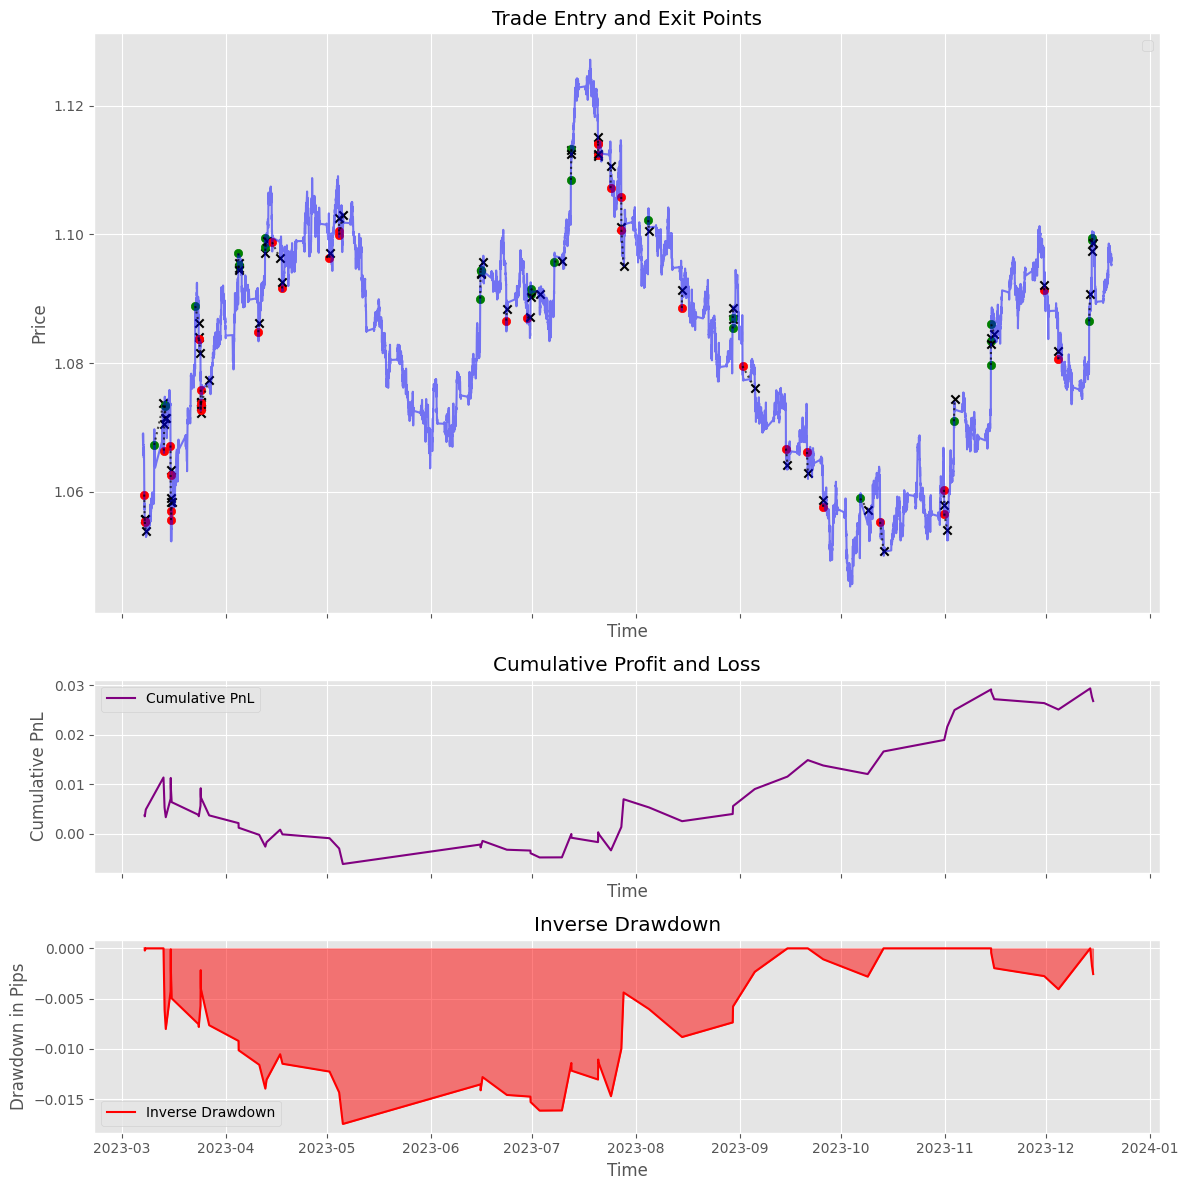

In [78]:
plot_trades(history_book,test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


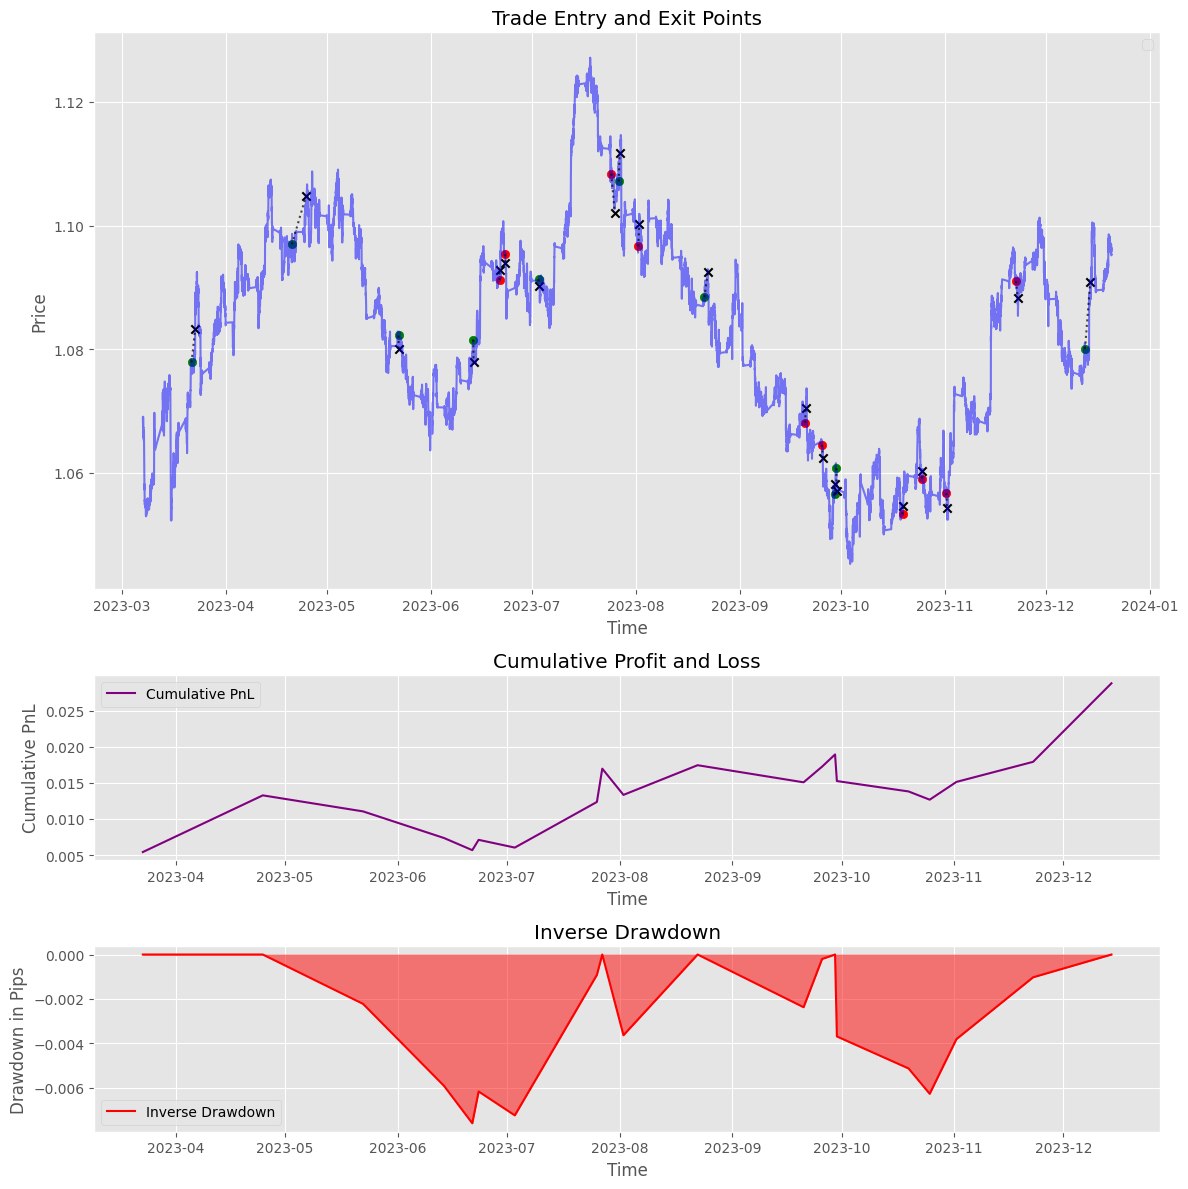

In [59]:
plot_trades(history_book,test)

In [41]:
history_book

,Type,Entry Price,Exit Price,Entry Time,Exit Time,PnL,Cumulative Profit
0,Long,1.07315,1.074960,2023-03-15 03:00:00,2023-03-15 05:00:00,0.001810,0.001810
1,Long,1.08373,1.090010,2023-03-29 17:15:00,2023-03-30 15:30:00,0.006280,0.008090
2,Long,1.09695,1.104800,2023-04-20 15:30:00,2023-04-24 20:45:00,0.007850,0.015940
3,Long,1.09725,1.096218,2023-05-11 07:00:00,2023-05-11 09:30:00,-0.001032,0.014908
4,Long,1.08723,1.085118,2023-05-16 09:30:00,2023-05-17 09:00:00,-0.002112,0.012796
5,Long,1.08127,1.079686,2023-05-22 09:00:00,2023-05-22 10:15:00,-0.001584,0.011212
6,Long,1.07065,1.074810,2023-06-08 10:30:00,2023-06-08 15:30:00,0.004160,0.015372
7,Long,1.07561,1.080340,2023-06-12 18:00:00,2023-06-13 10:15:00,0.004730,0.020102
8,Long,1.09054,1.092320,2023-06-27 03:45:00,2023-06-27 04:45:00,0.001780,0.021882
9,Long,1.09109,1.090190,2023-07-04 03:45:00,2023-07-04 07:45:00,-0.000900,0.020982
